In [57]:
from mpl_toolkits.mplot3d.axis3d import Axis

def patch_padding_axis3d(remove_padding_x = True, remove_padding_y = True, remove_padding_z = True,
                        margin_x = 1, margin_y = 1, margin_z = 1):
    """ See: https://stackoverflow.com/questions/16488182/removing-axes-margins-in-3d-plot"""
    def _get_coord_info_new(self, renderer):
        mins, maxs, cs, deltas, tc, highs = self._get_coord_info_old(renderer)
        correction = deltas * [margin_x * (1.0/4 + 6.0/11), margin_y * (1.0/4 + 6.0/11), margin_z * (1.0/4)]
        correction *= [remove_padding_x, remove_padding_y, remove_padding_z]
        mins += correction
        maxs -= correction
        
        return mins, maxs, cs, deltas, tc, highs
    if not hasattr(Axis, "_get_coord_info_old"):
        Axis._get_coord_info_old = Axis._get_coord_info  
    Axis._get_coord_info = _get_coord_info_new

patch_padding_axis3d(True, True, True, .95, .95, .95)

In [78]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

def normalize(x):
    x -= np.min(x)
    x /= np.max(x)
    return x

def plot_cube(data, min = None, scale_factor = 0.064, n_labels=32, dpi=200, background = True):
    if not min:
        min = np.min(list(data.shape))
    C = np.stack([data[-1,:min,:min],data[-1,:min,:min],data[-1,:min,:min]])#side slice
    C1 = np.stack([data[:min,0,:min],data[:min,0,:min],data[:min,0,:min]])#side slice
    C2 = np.stack([data[:min,:min,0],data[:min,:min,0],data[:min,:min,0]])#top slice

    C = np.einsum('abc->bca', C)
    C1 = np.einsum('abc->bca', C1)
    C2 = np.einsum('abc->bca', C2)

    C, C1, C2 = normalize([C, C1, C2])

    xp, yp, _ = C.shape

    x = np.arange(0, xp, 1)
    y = np.arange(0, yp, 1)
    Y, X = np.meshgrid(y, x)

    fig = plt.figure(figsize=(8,6), dpi=dpi)
    ax = fig.gca(projection='3d')
    ax.view_init(elev=38, azim=-45)
    
    ax.dist = 12

    ax.plot_surface(X, Y, X-X+yp-1, facecolors=C2,rstride=2, cstride=2,antialiased=True, shade=False)#top
    ax.plot_surface(X, X-X, Y, facecolors=np.fliplr(C1),rstride=2,cstride=2,antialiased=True, shade=False)#left
    ax.plot_surface(X-X+xp-1, X, Y, facecolors=np.fliplr(C),rstride=2,cstride=2,antialiased=True, shade=False)#right
    
    tick_labels = np.arange(0,np.round(0.064*min), 1)[::3]
    tick_pos = tick_labels*(1/0.064)
    
    tick_labels = tick_labels.astype(int)
    
    ax.set_zticks(tick_pos)
    ax.set_zticklabels(tick_labels)
    ax.set_yticks(tick_pos)
    ax.set_yticklabels(tick_labels)
    ax.set_xticks(tick_pos)
    ax.set_xticklabels(tick_labels)
    
    ax.set_xlabel("µm", fontsize=12, labelpad=8)
    ax.set_ylabel("µm", fontsize=12, labelpad=8)
    ax.set_zlabel("µm", fontsize=12, labelpad=8)
    
    if not background:
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        ax.xaxis.pane.set_edgecolor('w')
        ax.yaxis.pane.set_edgecolor('w')
        ax.zaxis.pane.set_edgecolor('w')

In [79]:
import os
#os.listdir("../../XRM/XRM_3min_rotated_section1.npy")

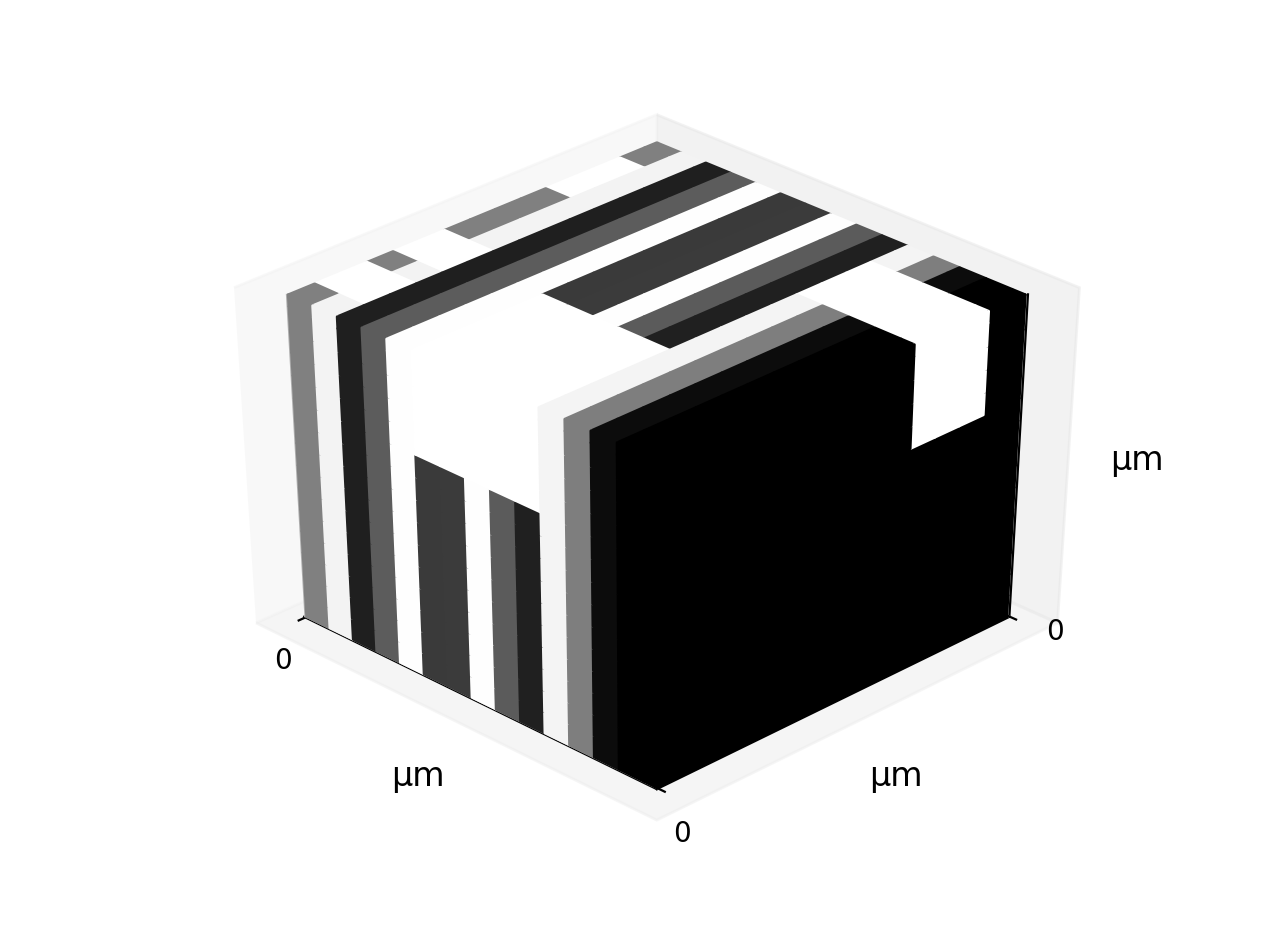

In [80]:
# Test data
data = np.zeros((30,30,30))
sin_img = np.array([(np.sin(np.arange(30))+1)*255 for i in range(30)])/2


sin_img[:,-4:] = 0

for i in range(10):
    data[:,i,:] = sin_img.T 
    
for i in range(10):
    data[:,:,i] = sin_img.T

data[10:20,:10,:10] = 255
data[0:4,2:5,:10] = 255
data[0:3,8:11,:10] = 255
data[0:2,20:25,:5] = 255
data[-10:,20:25,:10] = 255
plot_cube(data, min = None)


In [81]:
data = np.load("../../XRM/XRM_3min_rotated_section1.npy")

In [82]:
data = data[:300,:300,:300]

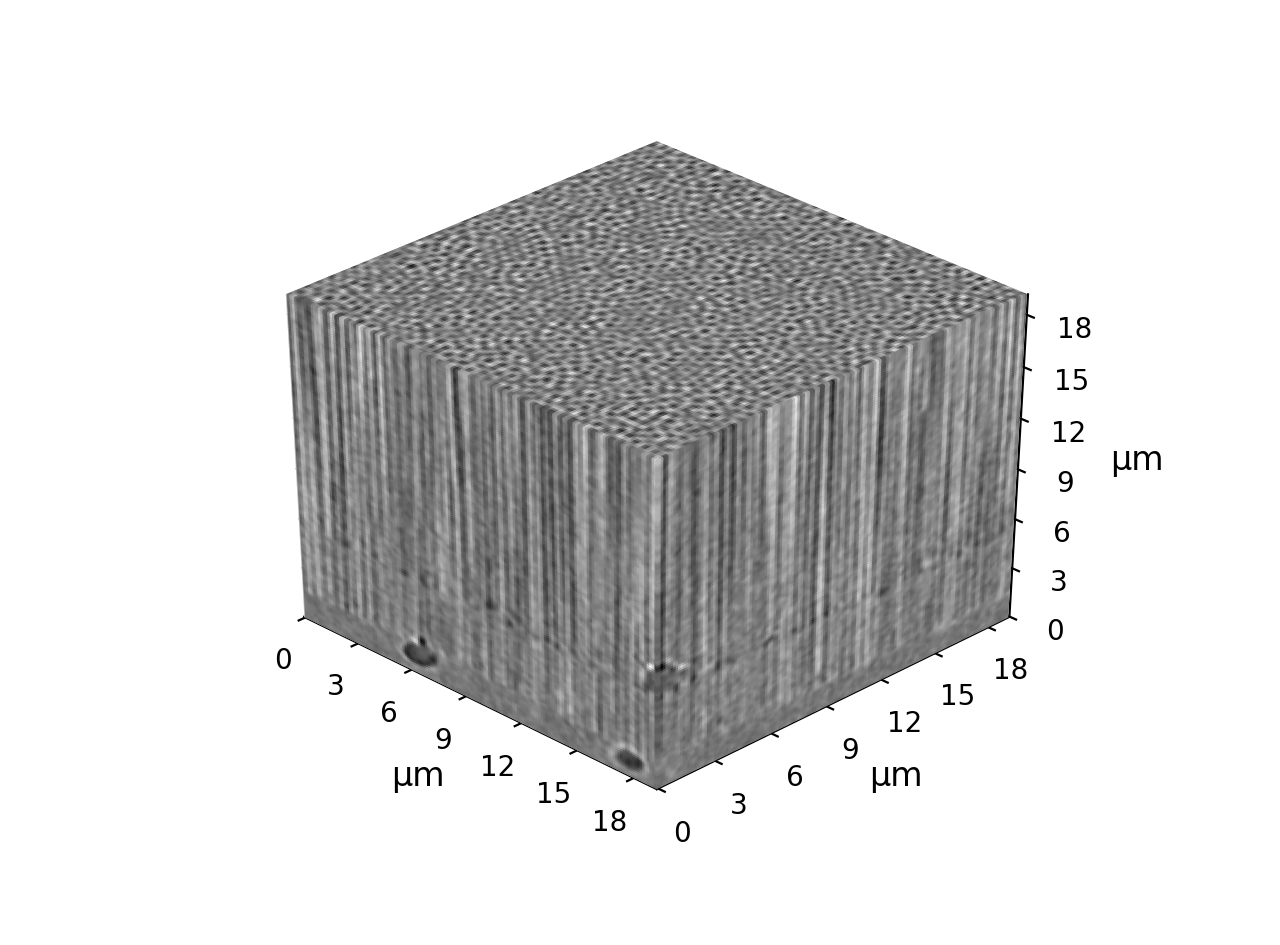

In [83]:
plot_cube(data, background = False)